In [36]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve

In [24]:
data = pd.read_csv(r"C:\Users\Kemalettin\Desktop\anlasekon\Python ile Makine Öğrenmesi\BreastCancerWisconsin.csv")
# gereksiz 2 sütun vardı onları silelim
data2 = data.copy()
data2 = data2.drop(columns=["id","Unnamed: 32"],axis=1)

In [25]:
# kategorik değişkenimizi sayısal değere çevirebiliriz. 
# one hot encoding gibi ama dümdüz çevireceğiz tek bir sütunda olmuş olacak
data2.diagnosis = [1 if kod =="M" else 0 for kod in data2.diagnosis]
data2.head() # görüldüğü gibi sayısal değerlere çevrilmiş durumda

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [26]:
y = data2["diagnosis"]
X = data2.drop(columns="diagnosis",axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [27]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
# artık modelimizi kurabiliriz
model = LogisticRegression(random_state=3)
model.fit(X_train,y_train)
y_preds = model.predict(X_test)

[0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1
 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0
 1 0 0]


[[73  1]
 [ 2 38]] 0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        74
           1       0.97      0.95      0.96        40

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



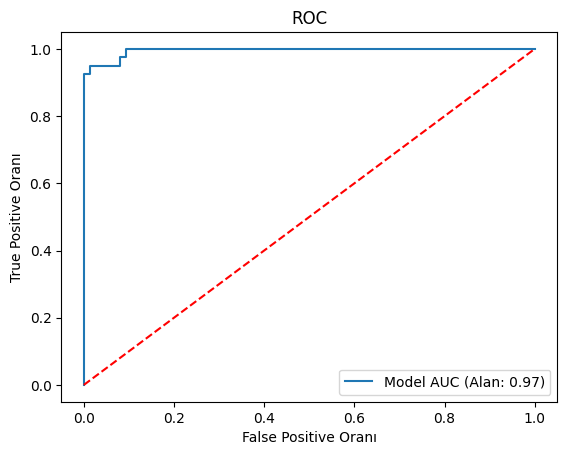

In [37]:
cm = confusion_matrix(y_test,y_preds)
acc = accuracy_score(y_test,y_preds)
print(cm,acc)
# tabi böyle tek tek yapmayacağız. Hepsini veren bir fonksiyonumuz var. 
cr = classification_report(y_test,y_preds)
print(cr)
auc = roc_auc_score(y_test,y_preds)
fpr, tpr, threshold = roc_curve(y_test,model.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,label="Model AUC (Alan: %0.2f)" % auc )
plt.plot([0,1],[0,1],"r--")
plt.xlabel("False Positive Oranı")
plt.ylabel("True Positive Oranı")
plt.title("ROC")
plt.legend(loc = "lower right")
plt.show()

üm oranlarımız ve roc eğrisini bu şekilde ortaya çıkartabiliriz. Sonuçta bu bir sınıflandırma problemi. 